# Prediction Using Decision Tree Algorithm
### Author : Raghav Bhattar

In [89]:
# importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [73]:
# loading the iris dataset
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Inspection

In [74]:
iris.shape

(150, 6)

The dataset includes three iris species with 50 samples each as well as some properties about each flower. The available columns in this dataset are: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, and Species.<br> <br>
The main task on this dataset is to create an iris (name of a flower) classifier based on a given properties that are the sepal and petal size.

In [75]:
# let's check if there are any null values
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values

In [76]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [77]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [78]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

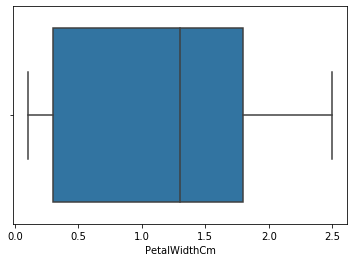

In [79]:
sns.boxplot(iris['PetalWidthCm'])

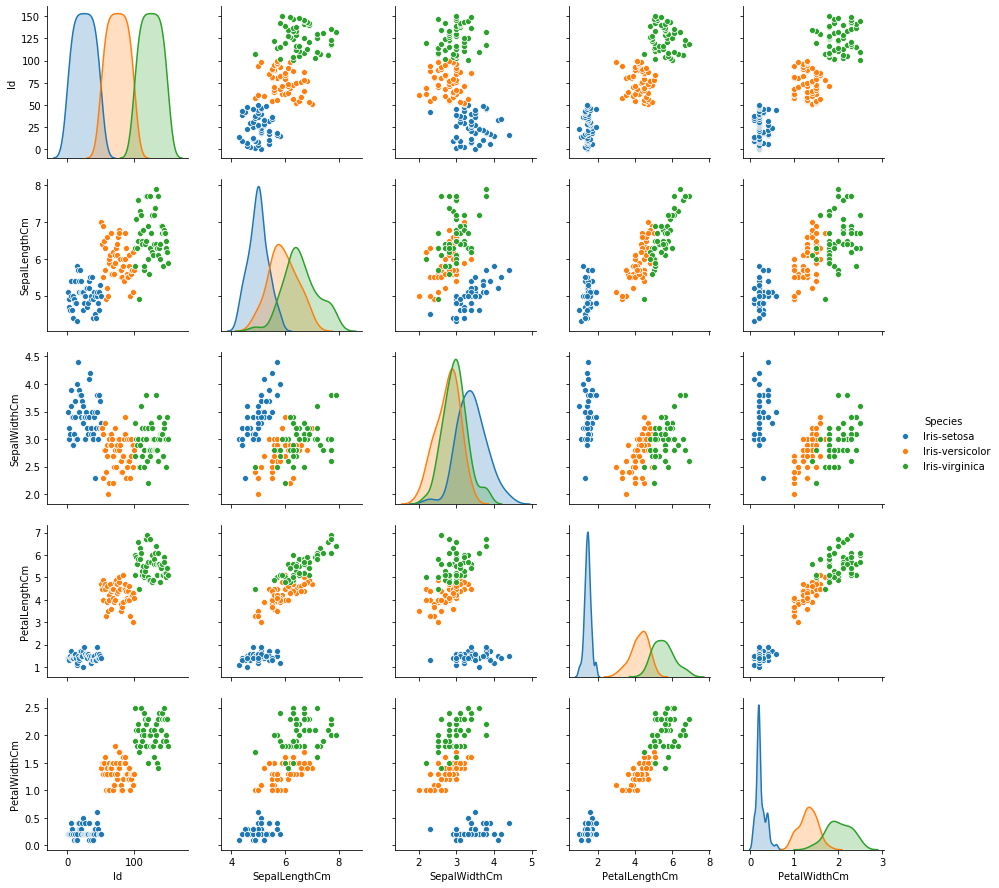

In [80]:
sns.pairplot(iris,hue='Species')

### Split into X and y

In [81]:
X=iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] ## list of independent features
y=iris['Species'] ## dependent feature

### Trai-test split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [83]:
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape))

Shape of X_train is (105, 4)
Shape of X_test is (45, 4)


## Building Decision Tree Classifier

In [84]:
dt=DecisionTreeClassifier(random_state=100)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

Decision Tree Classifier has been built

In [85]:
# evaluating for test data
dt.score(X_test,y_test)

0.9555555555555556

We have got an accuracy of 95% on the test data, which is pretty good.

### Plotting the tree

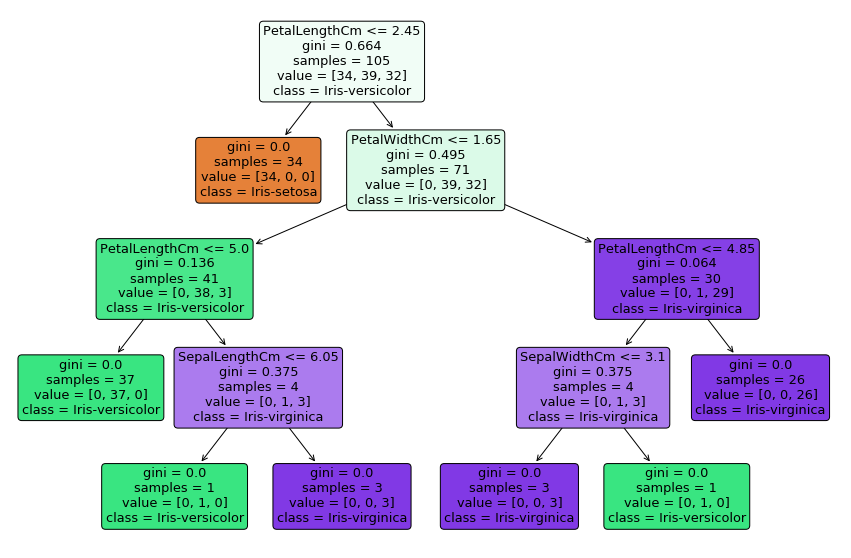

In [70]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True,rounded=True,feature_names=X_train.columns,class_names=list(iris.Species.value_counts().index))
plt.show()